# Assignment 2.6: NumPy Array Aggregations
Python for Data Analytics | Module 2  
Professor James Ng

In [1]:
# SETUP: EXECUTE BUT DO NOT CHANGE
import altair as alt
import numpy as np
import pandas as pd

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
# One last time, load the ND football roster data set
!curl -L https://osf.io/95kys/download --create-dirs -o data-sets/nd-football-2017-roster.csv
nd_football_roster = pd.read_csv('data-sets/nd-football-2017-roster.csv')
nd_football_roster.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   459  100   459    0     0   1264      0 --:--:-- --:--:-- --:--:--  1260
100  4184  100  4184    0     0   3917      0  0:00:01  0:00:01 --:--:-- 3213k


,Number,Name,Position,Height,Weight,Class,Hometown
0,2,Dexter Williams,RB,71,202,JR,"Winter Garden, FL"
1,3,C.J. Sanders,WR,68,185,JR,"Granada Hills, CA"
2,4,Te'von Coney,LB,73,235,JR,"Palm Beach Gardens, FL"
3,4,Montgomery VanGorder,QB,73,217,SR,"Buford, GA"
4,5,Nyles Morgan,LB,73,238,SR,"Crete, IL"


In [3]:
# Create `ndarray` objects for the various columns of the data set
player_names = np.array(nd_football_roster['Name'])
player_heights = np.array(nd_football_roster['Height'])
player_weights = np.array(nd_football_roster['Weight'])
player_numbers = np.array(nd_football_roster['Number'])
player_positions = np.array(nd_football_roster['Position'])
player_class = np.array(nd_football_roster['Class'])
player_home_state = np.array(nd_football_roster['Hometown'].str.partition(', ')[2])

## Section 1

In [4]:
# PROBLEM 1
# Complete the following, assign results to variables, and print your results
# - Find the tallest, shortest, and median heights on the team.
# - Display answers in both feet and inches

### BEGIN SOLUTION

# If student interpreted instructions as computing the heights in feet-inches (e.g. 5'9), 
# that is fine. Award full points.

tallest_player = np.max(player_heights) 
shortest_player = np.min(player_heights)
median_player = np.median(player_heights)

print("Inches:", tallest_player, shortest_player, median_player)

tallest_player = np.max(player_heights / 12) 
shortest_player = np.min(player_heights / 12)
median_player = np.median(player_heights / 12)

print("Feet:", tallest_player, shortest_player, median_player)

### END SOLUTION

Inches: 80 68 74.0
Feet: 6.666666666666667 5.666666666666667 6.166666666666667


In [5]:
# PROBLEM 2
# Complete the following, assign results to variables, and print your results
# - Use a for loop to obtain the average weight of each class 
#   (Freshman, Sophomore, etc) of football players

In [6]:
### BEGIN SOLUTION

# Students will likely use a list instead of `np.unique()`. Accept any approach that gives the correct result.
# 0.5 point off if not done in loop.

for current_class in np.unique(player_class):
    print("{} class average weight: {}".format(
        current_class, np.mean(player_weights[player_class == current_class])))
### END SOLUTION

FR class average weight: 241.33333333333334
JR class average weight: 229.51612903225808
SO class average weight: 220.0
SR class average weight: 263.03846153846155


In [7]:
# PROBLEM 3
# Complete the following, assign results to variables, and print your results
# - Determine the standard deviation for player heights for each position on the team
#   BUT only include sophomore, junior, and senior students in the calculations

In [8]:
### BEGIN SOLUTION
# Accept any approach that gives the correct result. Don't penalize if no loop.

for position in np.unique(player_positions):
    mask = (player_positions == position) & (player_class != 'FR')
    print("{} standard height deviation w/o Freshmen: {}".format(
        position, np.std(player_heights[mask])))

### END SOLUTION

CB standard height deviation w/o Freshmen: 1.6781914463529615
DL standard height deviation w/o Freshmen: 1.2364824660660938
LB standard height deviation w/o Freshmen: 1.233150906022776
LS standard height deviation w/o Freshmen: 0.0
OL standard height deviation w/o Freshmen: 1.7721444263289023
P standard height deviation w/o Freshmen: 2.0
PK standard height deviation w/o Freshmen: 1.0
QB standard height deviation w/o Freshmen: 0.5
RB standard height deviation w/o Freshmen: 1.224744871391589
S standard height deviation w/o Freshmen: 1.6909686573085854
TE standard height deviation w/o Freshmen: 1.3564659966250536
WR standard height deviation w/o Freshmen: 3.034320449740926


In [9]:
# PROBLEM 4
# Complete the following, assign results to variables, and print your results
# - What are the 25th, 75th, and 90th percentiles for player weight?
# - Do the calcuations again, but separate the percentiles so that FR/SO are
#   grouped together and JR/SR are grouped together.
# - In the end you should print info for "ALL PLAYERS", "FR/SO Players" and "JR/SR Players"

In [10]:
### BEGIN SOLUTION
# Part 1
print("ALL PLAYERS:", np.percentile(player_weights, [25, 75, 90]))

# Part 2
mask = (player_class == 'FR') | (player_class == 'SO')
print("FR/SO:", np.percentile(player_weights[mask], [25, 75, 90]))


mask = ~mask # Unlikely students will use this technique
print("JR/SR:", np.percentile(player_weights[mask], [25, 75, 90]))

### END SOLUTION

ALL PLAYERS: [201.25 276.75 308.2 ]
FR/SO: [198. 243. 287.]
JR/SR: [203.  294.  314.4]


In [11]:
# PROBLEM 5 - OH BOY! Nothing like writing FUNCTIONS!!
# - Define a function called `choose_your_percentiles()` that 
#   accepts a list of arrays and a list of percentiles.
# - The function must return a nested list (so one list that has other lists/arrays inside)
#   representing the requested percentiles for each array.
# - If the np.percentile function generates an exception for a given array, print
#   an error message to the user and skip to processing the next array.
# - Call your function with various arguments to demonstrate all logical
#   pathways through your code.

In [12]:
### BEGIN SOLUTION

# Question wording wasn't the best. Award full points for ANY approach that spits out a collection of 
# correct percentiles. 
# Whether student printed or returned the results doesn't matter.

def choose_your_percentiles(list_of_arrays, list_of_percentiles):
    data = list()
    for array in list_of_arrays:
        try:
            data.append(np.percentile(array, list_of_percentiles))
        except TypeError:
            print("The following array couldn't be processed because it "
                  "contained non-numeric data:\n", array)
        
    return data


choose_your_percentiles([player_heights, player_class, player_numbers], (5, 15, 90))
### END SOLUTION

The following array couldn't be processed because it contained non-numeric data:
 ['JR' 'JR' 'JR' 'SR' 'SR' 'JR' 'SR' 'JR' 'SO' 'JR' 'SO' 'SR' 'SO' 'FR'
 'JR' 'FR' 'SO' 'JR' 'JR' 'SO' 'JR' 'SR' 'SO' 'JR' 'FR' 'SR' 'JR' 'SO'
 'JR' 'SR' 'SO' 'SO' 'JR' 'SO' 'SR' 'SO' 'JR' 'SO' 'SO' 'JR' 'SO' 'SO'
 'JR' 'SO' 'JR' 'JR' 'SO' 'SO' 'SO' 'JR' 'SR' 'JR' 'JR' 'SO' 'SR' 'JR'
 'SO' 'SR' 'SR' 'JR' 'JR' 'JR' 'SR' 'SR' 'SR' 'SR' 'FR' 'SR' 'SR' 'FR'
 'SO' 'SR' 'JR' 'SO' 'SR' 'JR' 'SR' 'SO' 'SR' 'SO' 'JR' 'SR' 'SO' 'FR'
 'SO' 'SR' 'SR' 'JR' 'SR' 'JR']


[array([69.45, 71.  , 77.  ]), array([ 5.45, 15.7 , 86.1 ])]

## Just for Fun
Here are a couple of graphs showing the height/weight distributions among the football players. It's a bit of a taste of the cool stuff you'll be doing in the near future!

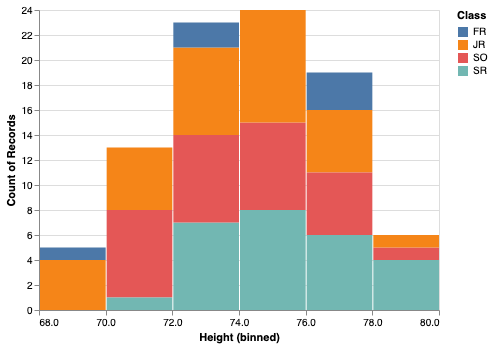

In [13]:
alt.Chart(nd_football_roster).mark_bar().encode(
    color=alt.Color('Class'),
    x=alt.X('Height', bin=True),
    y='count()')

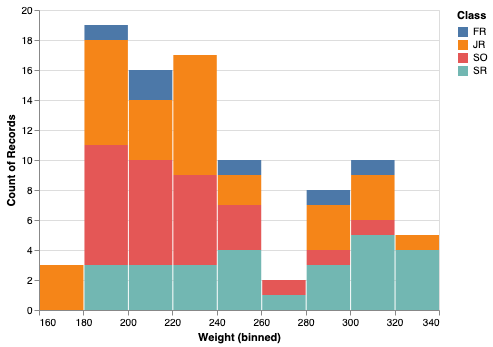

In [14]:
alt.Chart(nd_football_roster).mark_bar().encode(
    color=alt.Color('Class'),
    x=alt.X('Weight', bin=True),
    y='count()')